In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
with open("./yolo/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

In [7]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [8]:
len(classes)

80

In [9]:
# Load YOLO net
net = cv2.dnn.readNet("./yolo/yolov3.weights", "./yolo/yolov3.cfg")

In [10]:
# Get layers names
def get_output_layers(net):
    layer_names = net.getLayerNames()
    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
    return output_layers

In [11]:
get_output_layers(net)

['yolo_82', 'yolo_94', 'yolo_106']

In [42]:
def draw_bounding_boxes(img, class_id, confidence, x, y, x_plus_w, y_plus_h):
    label = str(classes[class_id])
    color = (255, 0, 0) # color = [float(c) for c in np.random.uniform(0, 255, size=(3,))]
    cv2.rectangle(img, (x, y), (x_plus_w, y_plus_h), color, 2)
    cv2.putText(img, label, (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

In [43]:
image = cv2.imread("../02_interpolation_feature_extraction/images/horse.jpg")

In [44]:
width, height = image.shape[1], image.shape[0]
scale = 0.00392

In [45]:
blob = cv2.dnn.blobFromImage(image, scale, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(get_output_layers(net))

In [46]:
blob.shape

(1, 3, 416, 416)

In [47]:
outs[0].shape

(507, 85)

In [48]:
class_ids = []
confidences = []
boxes = []
conf_threshold = 0.5
nms_threshold = 0.4

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > conf_threshold:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = center_x - w / 2
            y = center_y - h / 2
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])

# Remove overlapping boxes
indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

In [49]:
for i in indices:
    box = boxes[i]
    x, y, w, h = box[0], box[1], box[2], box[3]
    draw_bounding_boxes(image, class_ids[i], confidences[i], round(x), round(y), round(x + w), round(y + h))

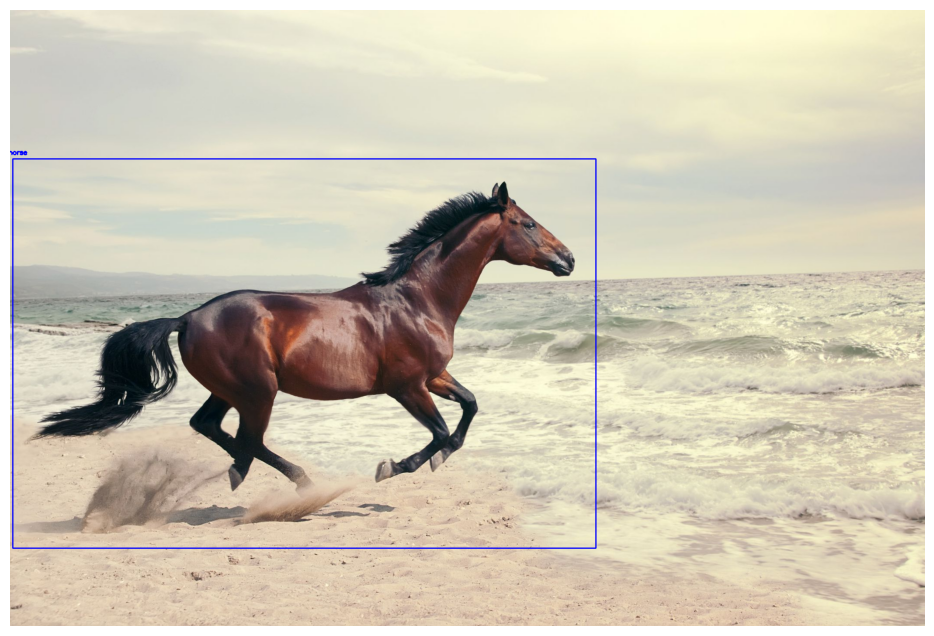

In [50]:
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 8))
plt.imshow(rgb_image)
plt.axis('off')
plt.show()

In [51]:
def detect_objects_in_image(image_path):
    image = cv2.imread(image_path)

    width, height = image.shape[1], image.shape[0]
    scale = 0.00392

    blob = cv2.dnn.blobFromImage(image, scale, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(get_output_layers(net))

    class_ids = []
    confidences = []
    boxes = []
    conf_threshold = 0.5
    nms_threshold = 0.4

    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > conf_threshold:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = center_x - w / 2
                y = center_y - h / 2
                class_ids.append(class_id)
                confidences.append(float(confidence))
                boxes.append([x, y, w, h])

    # Remove overlapping boxes
    indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

    for i in indices:
        box = boxes[i]
        x, y, w, h = box[0], box[1], box[2], box[3]
        draw_bounding_boxes(image, class_ids[i], confidences[i], round(x), round(y), round(x + w), round(y + h))

    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(12, 8))
    plt.imshow(rgb_image)
    plt.axis('off')
    plt.show()

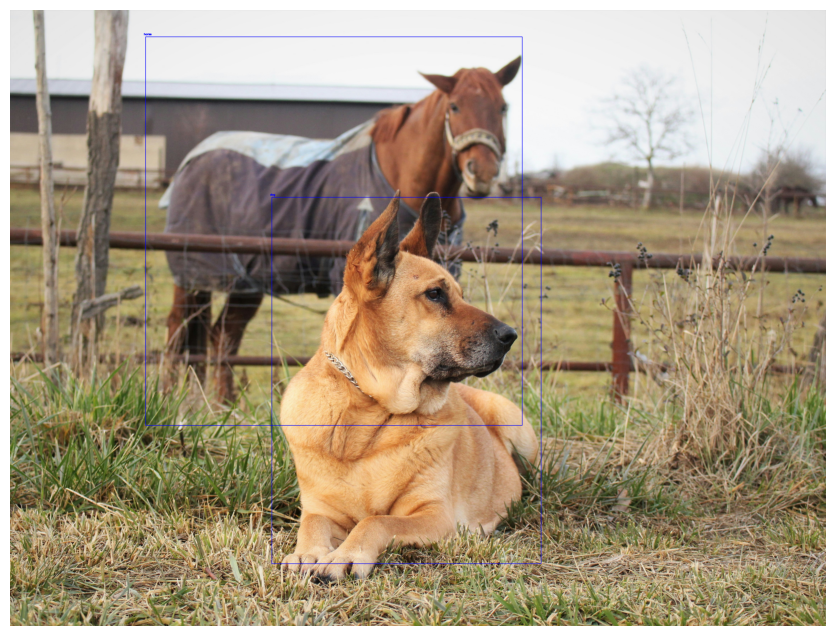

In [53]:
detect_objects_in_image("./sample.jpg")

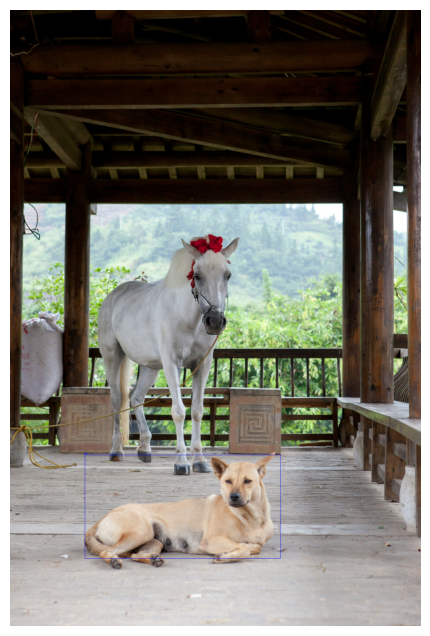

In [54]:
detect_objects_in_image("./sample2.jpg")